Name: Raghav Sharma <br>
Roll no: 25201313

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [2]:
np.random.seed(42)
weights = np.random.randint(0, 100, size=200)
labels = (weights > 50).astype(int)

In [3]:
X = weights.reshape(-1, 1)
y = labels

In [4]:
model = LogisticRegression()

In [5]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []

In [7]:
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]


    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

In [8]:
print("Accuracies for each fold:", accuracies)
print("Average accuracy:", np.mean(accuracies))

Accuracies for each fold: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average accuracy: 1.0


In [9]:
weights_sorted = np.linspace(0, 100, 200).reshape(-1, 1)
probabilities = model.predict_proba(weights_sorted)[:, 1]

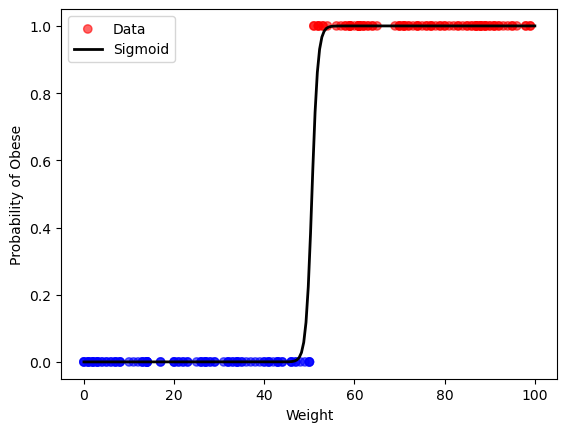

In [10]:
plt.scatter(weights, labels, c=labels, cmap='bwr', alpha=0.6, label="Data")
plt.plot(weights_sorted, probabilities, color='black', linewidth=2, label="Sigmoid")
plt.xlabel("Weight")
plt.ylabel("Probability of Obese")
plt.legend()
plt.show()